In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import sqlite3
from konlpy.tag import Kkma
kkma=Kkma()
from nltk import FreqDist

In [2]:
import nltk
from nltk.tokenize import word_tokenize,WhitespaceTokenizer, WordPunctTokenizer
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kpd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
# db에서 데이터 가져오기
dbname='wadiz.db'
def getData(cols='*',whr='',tblname='wadiztable'):
    with sqlite3.connect(dbname) as conn:
        cur=conn.cursor()
        sql='select '+ cols+' from '+tblname+' '+whr
        data=cur.execute(sql).fetchall()
    return data

res=getData('ncontent')

In [4]:
# 형태소 단위로 분해해서 그 중 중요한 것들만 추출 
def tknWord(txt):
    kpos=kkma.pos(txt)
    cate=['NNG','NNP','NNB','VV','VA','VCP','VCN','MAG','MAC']
    tkn=[]
    for k in kpos:
        if(k[1] in cate):
            if (len(k[0])>1):
                tkn.append(k[0])
    return tkn

In [5]:
# 형태소로 분해한 것들을 join으로 붙여서 str로 변환
def makeTxta(rn):
    txta=[]
    for res in rn:
        txta.append(tknWord(res))
    txtall=''
    for txt in txta:
        txtall+=' '.join(txt)
    return txtall
# makeTxta(res[0])

In [6]:
# wordmap을 만들기 위한 함수
def makeWmap(txt,mc_num=200):
    txt=txt.lower()
    kps=kkma.pos(txt)
    kp=[k[0] for k in kps]
    nltkkr=' '.join(kp)
    nltkkr
    words=word_tokenize(nltkkr)
    wfreq=FreqDist(words) 
    mostcom=wfreq.most_common(mc_num)
    return mostcom

In [8]:
# np.ravel으로 list형태로 변환
rn=np.ravel(res)
totmcw=makeWmap(makeTxta(rn)) # 전체 사전(kn)을 만들기 위함
totmcw

[('오팔', 51),
 ('사용', 38),
 ('ㄹ', 37),
 ('제품', 33),
 ('아', 33),
 ('어', 30),
 ('제작', 29),
 ('위하', 29),
 ('디자인', 28),
 ('천연', 27),
 ('가능', 27),
 ('보석', 27),
 ('나무', 26),
 ('르', 26),
 ('리워드', 22),
 ('프로젝트', 22),
 ('하', 21),
 ('니', 19),
 ('발송', 18),
 ('반지', 18),
 ('이', 17),
 ('자연', 16),
 ('알', 16),
 ('서포터', 16),
 ('퀄리티', 16),
 ('동물', 15),
 ('가죽', 15),
 ('함께', 15),
 ('기능', 15),
 ('진행', 13),
 ('사이즈', 13),
 ('가방', 13),
 ('가장', 12),
 ('결제', 12),
 ('가격', 12),
 ('보이', 12),
 ('드리', 12),
 ('만들', 11),
 ('부분', 11),
 ('다양', 11),
 ('따', 11),
 ('가', 11),
 ('세팅', 11),
 ('경우', 11),
 ('반환', 11),
 ('소재', 10),
 ('형태', 10),
 ('조절', 10),
 ('배송', 10),
 ('지갑', 9),
 ('가지', 9),
 ('나', 9),
 ('과정', 9),
 ('경험', 9),
 ('컬러', 9),
 ('통', 9),
 ('착용', 9),
 ('일정', 9),
 ('더욱', 9),
 ('특징', 9),
 ('우드', 8),
 ('모두', 8),
 ('리', 8),
 ('효과', 8),
 ('직접', 8),
 ('추가', 8),
 ('지', 8),
 ('체인', 8),
 ('도금', 8),
 ('문의', 8),
 ('교환', 8),
 ('환경', 7),
 ('재료', 7),
 ('소개', 7),
 ('사', 7),
 ('혜택', 7),
 ('시간', 7),
 ('다', 7),
 ('느끼', 7),
 ('색상', 7),


In [ ]:
# makeTxta 적용하여 str로 변환된 3개 게시글 모두 합침
totmcwi=[]
for i in range(3):
    totmcwi.append(makeTxta(res[i]))
# totmcwi[0]

In [9]:
ks=[]
wdic={}
i=0
for k,v in totmcw:
    ks.append(k)
    wdic[i]=v
    i+=1
print(ks,wdic)

['오팔', '사용', 'ㄹ', '제품', '아', '어', '제작', '위하', '디자인', '천연', '가능', '보석', '나무', '르', '리워드', '프로젝트', '하', '니', '발송', '반지', '이', '자연', '알', '서포터', '퀄리티', '동물', '가죽', '함께', '기능', '진행', '사이즈', '가방', '가장', '결제', '가격', '보이', '드리', '만들', '부분', '다양', '따', '가', '세팅', '경우', '반환', '소재', '형태', '조절', '배송', '지갑', '가지', '나', '과정', '경험', '컬러', '통', '착용', '일정', '더욱', '특징', '우드', '모두', '리', '효과', '직접', '추가', '지', '체인', '도금', '문의', '교환', '환경', '재료', '소개', '사', '혜택', '시간', '다', '느끼', '색상', '느낌', '편안', '기', '때문', '지퍼', '택배', '정책', '바라', '메이커', '멀', '티', '자유', '스트랩', '세상', '친화', '이상', '장인', '마음', '노력', '와디', '특별', '일반적', '완성', '준비', '전달', '정도', '오', '유색', '확인', '모', '도', '모든', '바디', '구성', '종료', '태스킹', '레더', '플랩', '페이지', '거치', '무늬목', '브랜드', '개발', '특성', '질', '기간', '보', '용하', '최상급', '색감', '단순', '매력', '떠하', '공기', '시작', '아름다움', '관련', '단계', '가치', '예정', '여왕', '름답', '촬영', '생기', '의', '커팅', '기본', '토파즈', '방법', '고가', '구', '길이', '보관', '화이트', '변경', '수리', '감사', '안내', '지역', '아래', '사유', '업체', '금속', '한번', '충실', '사이드', '양쪽', '버전

In [16]:
# 3개 게시글 전체를 참고한 단어 사전 만들기
def wmap2list(txt, keys=ks):
    res=[]
    for i in range(200):
        res.append(0)
    for t in txt:
        if t[0] in keys:
            idx=keys.index(t[0])
            res[idx]=t[1]
    return res

In [22]:
# 각 게시글에서 앞에서 만든 단어 사전을 참고해서 각각의 maplist를 만듬
maplist=[]
for sen in totmcwi:
    sendic=makeWmap(sen)
    wm=wmap2list(sendic,ks)
    maplist.append(wm)

In [29]:
# 한글 글씨 나오게
from matplotlib import font_manager,rc
import matplotlib.pyplot as plt
font_path="C:\Windows\Fonts\malgun.ttf" # dir로 영어이름 찾기
font=font_manager.FontProperties(fname=font_path).get_name()
print(font)
rc('font',family=font)

Malgun Gothic


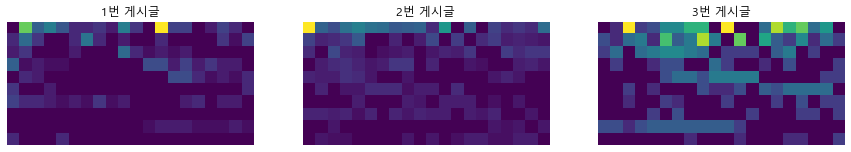

In [30]:
fig=plt.figure(figsize=(15,5))
ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)

ax1.imshow(np.array(maplist[0]).reshape(10,20))
ax1.axis('off')

ax2.imshow(np.array(maplist[1]).reshape(10,20))
ax2.axis('off')

ax3.imshow(np.array(maplist[2]).reshape(10,20))
ax3.axis('off')

ax1.set_title('1번 게시글')
ax2.set_title('2번 게시글')
ax3.set_title('3번 게시글')

plt.show()